In [153]:
# EDA
# data preparation for the machine learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from itertools import combinations
%matplotlib notebook

# show more columns and rows
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [154]:
data = pd.read_csv('stud_math.xls')

In [155]:
display(data.head(15))
data.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1      GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2      GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3      GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4      GP   F   16       U     GT3       T   3.0   3.0     other     other   
5      GP   M   16       U     LE3       T   4.0   3.0  services     other   
6      GP   M   16     NaN     LE3       T   2.0   2.0     other     other   
7      GP   F   17       U     GT3       A   4.0   4.0     other   teacher   
8      GP   M   15       U     LE3       A   3.0   2.0  services     other   
9      GP   M   15       U     NaN     NaN   3.0   4.0     other     other   
10     GP   F   15       U     GT3       T   4.0   4.0   teacher    health   
11     GP   F   15       U     GT3     NaN   2.0  40.0  services     other   
12     GP   M   15       U     LE3       T   4.0   4.0    health  services   
13     GP   M   15       U     GT3       T   4.0   3.0   teacher     other   
14     GP   M   15       U     GT3       A   2.0   2.0     other     other   

        reason guardian  traveltime  studytime  failures schoolsup famsup  \
0       course   mother         2.0        2.0       0.0       yes     no   
1       course   father         1.0        2.0       0.0        no    yes   
2        other   mother         1.0        2.0       3.0       yes     no   
3         home   mother         1.0        3.0       0.0        no    yes   
4         home   father         1.0        2.0       0.0        no    yes   
5   reputation   mother         1.0        2.0       0.0        no    yes   
6         home   mother         1.0        2.0       0.0        no     no   
7         home   mother         2.0        2.0       0.0       yes    yes   
8         home   mother         1.0        2.0       0.0        no    yes   
9         home   mother         1.0        2.0       0.0        no    yes   
10  reputation   mother         1.0        2.0       0.0        no    yes   
11  reputation   father         3.0        3.0       0.0        no    yes   
12      course   father         1.0        1.0       0.0        no    yes   
13      course   mother         2.0        2.0       0.0        no    yes   
14        home    other         1.0        3.0       0.0        no    yes   

   paid activities nursery  studytime, granular higher internet romantic  \
0    no         no     yes                 -6.0    yes      NaN       no   
1    no         no      no                 -6.0    yes      yes       no   
2   NaN         no     yes                 -6.0    yes      yes      NaN   
3   yes        yes     yes                 -9.0    yes      yes      yes   
4   yes         no     yes                 -6.0    yes       no       no   
5   yes        yes     yes                 -6.0    yes      yes       no   
6    no         no     yes                 -6.0    yes      yes       no   
7    no         no     yes                 -6.0    yes       no       no   
8   yes         no     yes                 -6.0    yes      yes       no   
9   yes        yes     yes                 -6.0    yes      yes       no   
10  yes         no     yes                 -6.0    yes      yes       no   
11   no        yes     yes                 -9.0    yes      yes       no   
12  yes        yes     yes                 -3.0    yes      NaN       no   
13  yes         no     yes                 -6.0    yes      yes      NaN   
14   no         no     yes                 -9.0    yes      yes      yes   

    famrel  freetime  goout  health  absences  score  
0      4.0       3.0    4.0     3.0       6.0   30.0  
1      5.0       3.0    3.0     3.0       4.0   30.0  
2      4.0       3.0    2.0     3.0      10.0   50.0  
3      3.0       2.0    2.0     5.0       2.0   75.0  
4      4.0       3.0    2.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [156]:
data.columns = data.columns.str.lower()
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [157]:
# look at the unique data before formatting

# I didn't find another way to look at the whole unique data per column, if you know  better/nicer way, please write it down

unique_values_1 = data.apply(lambda col: col.sort_values().unique())

print(unique_values_1.iloc[:28])
print(unique_values_1.iloc[28:])

# we don't see any empty lines here, but there are nan's here. So we don't need to replace or remove any data here.
# all nominative values are within initially given data

school                                                         [GP, MS]
sex                                                              [F, M]
age                                    [15, 16, 17, 18, 19, 20, 21, 22]
address                                                     [R, U, nan]
famsize                                                 [GT3, LE3, nan]
pstatus                                                     [A, T, nan]
medu                                     [0.0, 1.0, 2.0, 3.0, 4.0, nan]
fedu                               [0.0, 1.0, 2.0, 3.0, 4.0, 40.0, nan]
mjob                   [at_home, health, other, services, teacher, nan]
fjob                   [at_home, health, other, services, teacher, nan]
reason                           [course, home, other, reputation, nan]
guardian                                   [father, mother, other, nan]
traveltime                                    [1.0, 2.0, 3.0, 4.0, nan]
studytime                                     [1.0, 2.0, 3.0, 4.

In [158]:
# get qualitative and quantitative column names
num_cols = data.select_dtypes(include='number').columns
all_cols = data.columns.tolist()
cat_cols = [x for x in all_cols if x not in num_cols]

# another type of finding qualitative columns, check for missing columns
cat_cols = data.select_dtypes(exclude=[np.number]).columns
len(num_cols)+len(cat_cols) == len(all_cols)

True

In [159]:
# functions

# check IQR
# calculate iqr & rest data; prepare either list of lists with data or just print values (should be arg pr)
# lb - lowest border
# hb - highest border
def iqr(dt, cl, pr=None):
    IQR = dt.loc[:, cl].quantile(0.75) - dt.loc[:, cl].quantile(0.25)
    perc25 = dt.loc[:, cl].quantile(0.25)
    perc75 = dt.loc[:, cl].quantile(0.75)
    lb = perc25 - 1.5*IQR
    hb = perc75 + 1.5*IQR

    if pd.isnull(pr):
        return [IQR, perc25, perc75, lb, hb, dt.loc[:, cl].max(), dt.loc[:, cl].min(), cl]
    else:
        print(cl,
              '25-й перцентиль: {},'.format(perc25),
              '75-й перцентиль: {},'.format(perc75),
              "IQR: {}, ".format(IQR),
              "Границы выбросов: [{lb}, {hb}].".format(lb=lb, hb=hb))


# hist function
# plots all hists together to have a look in general

# features - list of columns to plot
# rows, cols - number of rows & cols for hists
# fg1,2 - figure size
# b - number of bins per hist
def histograms_plot(dataframe, features, rows, cols, fg1, fg2, b):
    fig = plt.figure(figsize=(fg1, fg2))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=b, ax=ax, facecolor='blue')
        ax.set_title(feature+" distribution", color='#1D0772')

        fig.tight_layout()
    plt.show()


# plot one hist to check outliers closer or just to look deeper

# tit - hist title
# rhb - reviewed highest border in 'Здравый смысл'
# rlb - reviewed lowest border in 'Здравый смысл'
# one of rhb or rlb could be missed

def hist_check(dth, b, tit, rhb=None, rlb=None):
    IQR = dth.quantile(0.75) - dth.quantile(0.25)
    perc25 = dth.quantile(0.25)
    perc75 = dth.quantile(0.75)
    lb = perc25 - 1.5*IQR
    hb = perc75 + 1.5*IQR

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{lb}, {hb}].".format(lb=lb, hb=hb))

    fig = plt.figure()
    dth.loc[dth.between(
        lb,
        hb)].hist(bins=b, label='IQR')

    if rlb != None and rhb != None:
        dth.loc[(rlb <= dth) & (dth <= rhb)].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')
    elif pd.isnull(rlb) and rhb != None:
        dth.loc[dth <= rhb].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')
    elif pd.isnull(rhb) and rlb != None:
        dth.loc[rlb <= dth].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')

    plt.legend()
    plt.title(tit)
    return [lb, hb]

# boxplot function


def get_boxplot(d, column):
    fig, ax = plt.subplots(figsize=(d[column].nunique()*1.5, 4))
    sns.boxplot(x=column, y='score',
                data=d,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# t-test function is below

In [160]:
# prepare all IQR to find columns with outliers
al = []
for col in num_cols:
    al.append(iqr(data, col))
    #print(d, col)

# find columns with outliers => NaN in outlier column
all_borders = pd.DataFrame(
    al, columns=['IQR', 'perc25', 'perc75', 'lb', 'hb', 'max_v', 'min_v', 'data'])
all_borders.loc[(all_borders.hb >= all_borders.max_v) & (
    all_borders.lb <= all_borders.min_v), 'outlier'] = 'no'

all_borders

IQR  perc25  perc75    lb     hb  max_v  min_v                 data  \
0    2.0    16.0    18.0  13.0   21.0   22.0   15.0                  age   
1    2.0     2.0     4.0  -1.0    7.0    4.0    0.0                 medu   
2    1.0     2.0     3.0   0.5    4.5   40.0    0.0                 fedu   
3    1.0     1.0     2.0  -0.5    3.5    4.0    1.0           traveltime   
4    1.0     1.0     2.0  -0.5    3.5    4.0    1.0            studytime   
5    0.0     0.0     0.0   0.0    0.0    3.0    0.0             failures   
6    3.0    -6.0    -3.0 -10.5    1.5   -3.0  -12.0  studytime, granular   
7    1.0     4.0     5.0   2.5    6.5    5.0   -1.0               famrel   
8    1.0     3.0     4.0   1.5    5.5    5.0    1.0             freetime   
9    2.0     2.0     4.0  -1.0    7.0    5.0    1.0                goout   
10   2.0     3.0     5.0   0.0    8.0    5.0    1.0               health   
11   8.0     0.0     8.0 -12.0   20.0  385.0    0.0             absences   
12  30.0    40.0    70.0  -5.0  115.0  100.0    0.0                score   

   outlier  
0      NaN  
1       no  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9       no  
10      no  
11     NaN  
12      no

In [161]:
# according to the all borders:
# age, medu, traveltime, studytime, failures, freetime, goout, health - are within borders
# fedu, famrel - have outliers
# studytime, granular, absences, score - don't have certain borders

<IPython.core.display.Javascript object>


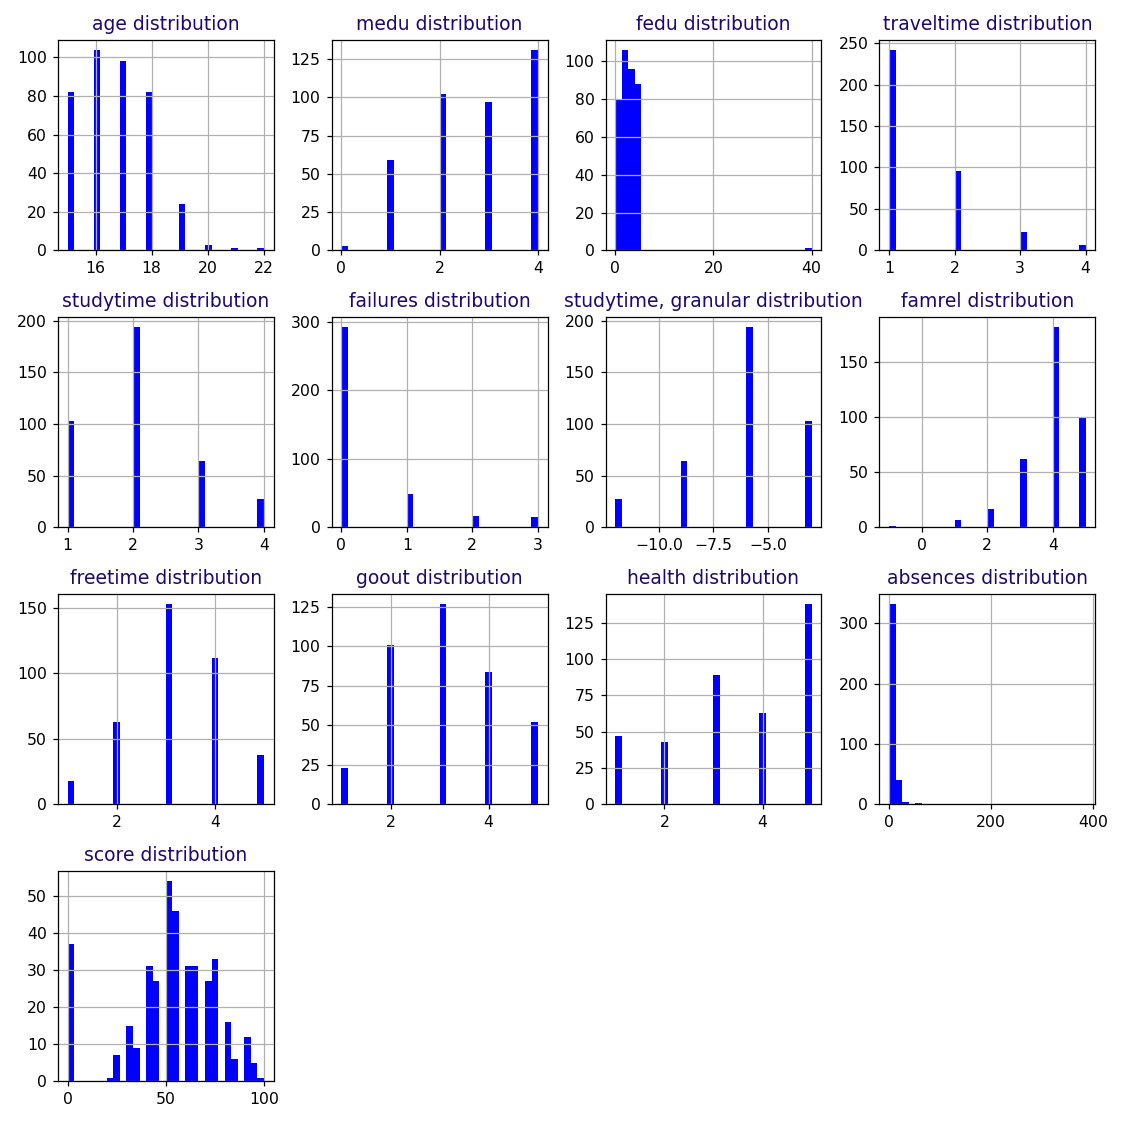

In [162]:
# plot & look at variability of all quantitative data in general
histograms_plot(data, num_cols, 4, 4, fg1=10, fg2=10, b=30)

In [163]:
# About distribution
# age - most of the children are between 15 & 18 years
# medu & fedu - there is a big distribution in parents education, but almost all of them studied at school at least 1 year
# traveltime - most of children live near the school
# studytime - children usually spend 2-5 hours studying per week apart from school
# failures - children usually don't have failures
# studytime, granular - usually -6
# famrel - children have good family relationships
# freetime, goout - children have enough freetime & spend enough time with friends
# health - children have widely spread health distribution but most of them have good health
# absences - most of children has 0 absences
# apart from some strange children with 0 score, most of them has score > 50

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


<IPython.core.display.Javascript object>


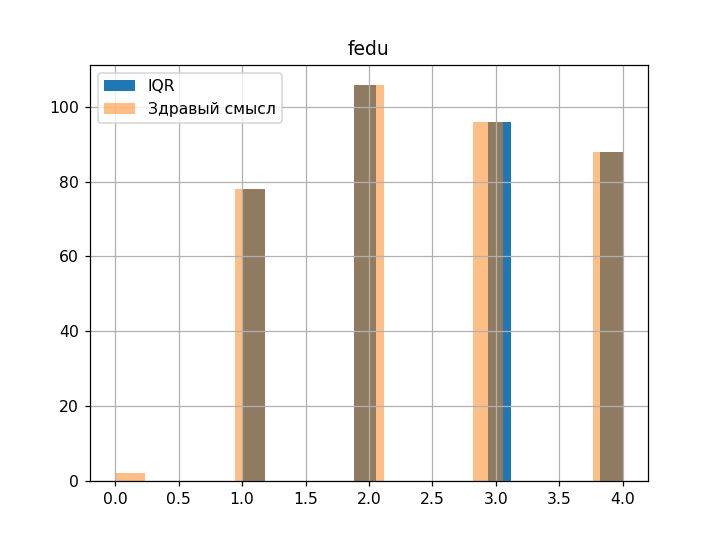

In [164]:
# check all outliers separately
# plot the data and save new borders data into bord variable
col_name = 'fedu'
bord = hist_check(data[col_name], 17, tit=col_name, rhb=4)

In [165]:
# filter the outliers
# filter by newly calculated borders (or by reviewed conclusions) as after some filtering they could be changed
# that's why don't plot all hists together with all_borders
# leave NaN's while filtering, those rows could have data in other columns


display(data[col_name].value_counts())
data = data.loc[(data[col_name].between(0, bord[1]))
                | (data[col_name].isnull())]
display(data[col_name].value_counts())

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: fedu, dtype: int64

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


<IPython.core.display.Javascript object>


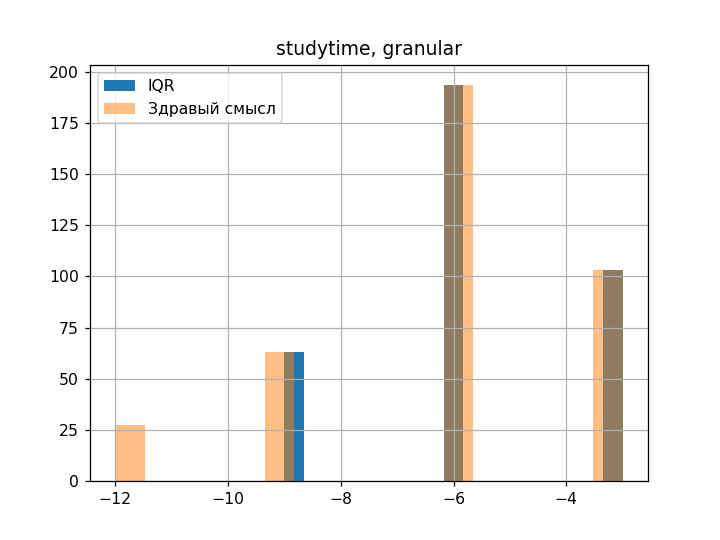

67    -12.0
282   -12.0
47    -12.0
330   -12.0
95    -12.0
       ... 
112     NaN
129     NaN
227     NaN
266     NaN
314     NaN
Name: studytime, granular, Length: 394, dtype: float64

In [166]:
col_name = 'studytime, granular'
bord = hist_check(data[col_name], 17, tit=col_name, rlb=-15)
display(data[col_name].sort_values())
# will leave -12 also as there are a lot of chilfren with such value (almost 7% of the data)
# also because we don't know for sure what current column means

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


<IPython.core.display.Javascript object>


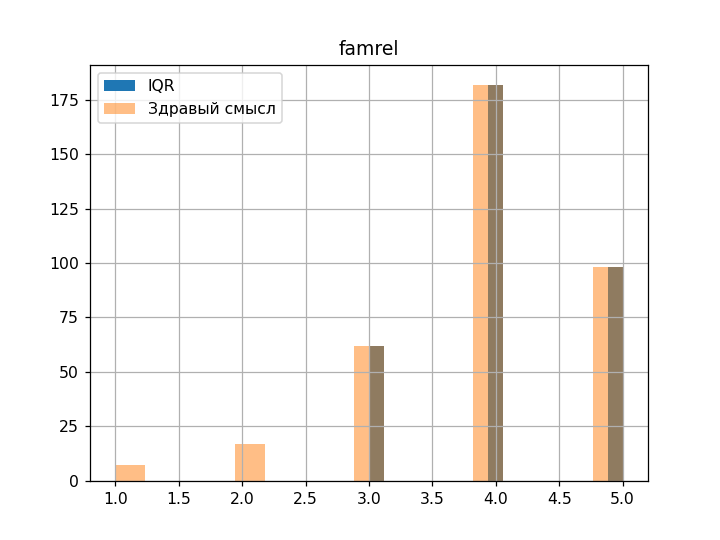

In [167]:
col_name = 'famrel'
bord = hist_check(data[col_name], 17, tit=col_name, rlb=1, rhb=5)

In [168]:
#  just skip outliers which are out of bounds
data = data.loc[(data[col_name].between(1, 5)) | (data[col_name].isnull())]
display(data[col_name].sort_values())

357    1.0
389    1.0
108    1.0
207    1.0
184    1.0
      ... 
348    NaN
349    NaN
355    NaN
360    NaN
373    NaN
Name: famrel, Length: 393, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<IPython.core.display.Javascript object>


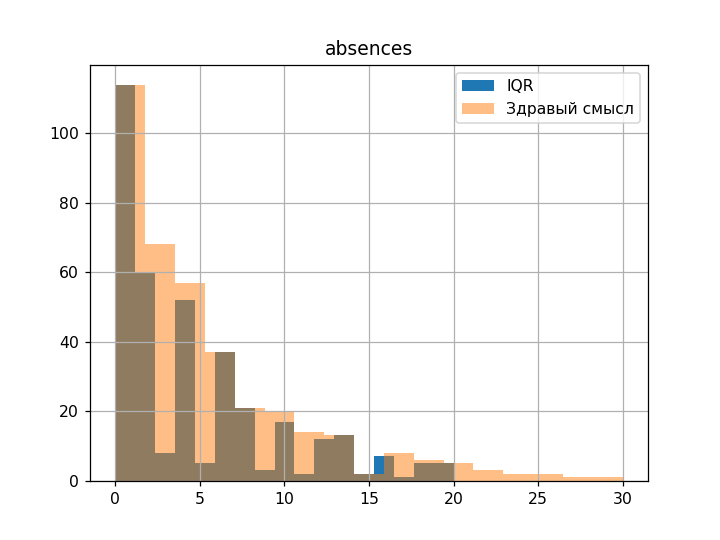

In [169]:
col_name = 'absences'
bord = hist_check(data[col_name], 17, tit=col_name, rhb=30)

In [170]:
# 30 - seems to be the highest border here
display(data[col_name].sort_values())
data = data.loc[(data[col_name].between(bord[0], 30))
                | (data[col_name].isnull())]
display(data[col_name].sort_values())

126    0.0
134    0.0
135    0.0
136    0.0
137    0.0
      ... 
227    NaN
254    NaN
265    NaN
270    NaN
352    NaN
Name: absences, Length: 393, dtype: float64

124    0.0
134    0.0
135    0.0
136    0.0
137    0.0
      ... 
227    NaN
254    NaN
265    NaN
270    NaN
352    NaN
Name: absences, Length: 386, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


<IPython.core.display.Javascript object>


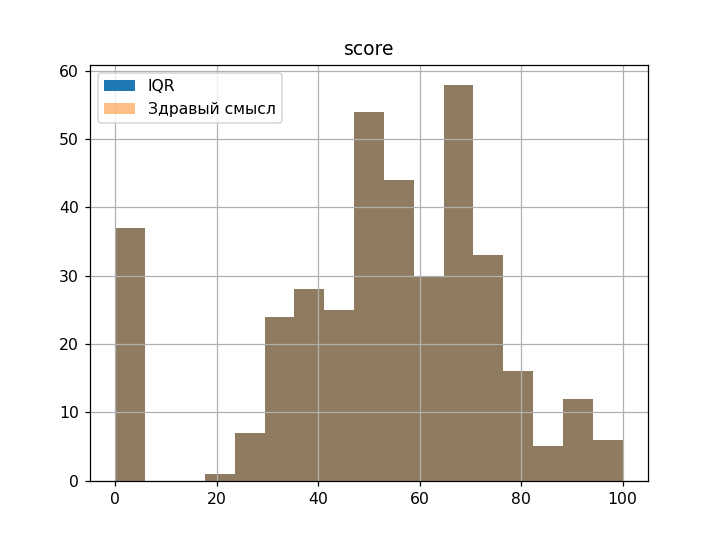

In [171]:
col_name = 'score'
bord = hist_check(data[col_name], 17, tit=col_name, rhb=100)
# there are a lot of children with 0 score so i don't think that it's an outlier - it's a big percent from all, so leave them

In [172]:
# prepare second borders df to look at the filtered data
al = []
for col in num_cols:
    al.append(iqr(data, col))


# find columns with outliers => NaN in outlier column
all_borders_f = pd.DataFrame(
    al, columns=['IQR', 'perc25', 'perc75', 'lb', 'hb', 'max_v', 'min_v', 'data'])
all_borders_f.loc[(all_borders_f.hb >= all_borders_f.max_v) & (
    all_borders_f.lb <= all_borders_f.min_v), 'outlier'] = 'no'

all_borders_f

# all columns which initially have borders are according to conditions
# studytime, granular - is untouched as we don't know what this column is for & it has only 4 unique values,
# there are a lot of outlying values
# absences - has been filtered according to the conclusions made after viewing the data
# score - according to the newly filtered data doesn't have an outliers any more,
# it has big percentage of children which have 0 score - don't think that it's an outlier as it's almost 10% of the data

IQR  perc25  perc75    lb     hb  max_v  min_v                 data  \
0    2.0    16.0    18.0  13.0   21.0   22.0   15.0                  age   
1    2.0     2.0     4.0  -1.0    7.0    4.0    0.0                 medu   
2    1.0     2.0     3.0   0.5    4.5    4.0    0.0                 fedu   
3    1.0     1.0     2.0  -0.5    3.5    4.0    1.0           traveltime   
4    1.0     1.0     2.0  -0.5    3.5    4.0    1.0            studytime   
5    0.0     0.0     0.0   0.0    0.0    3.0    0.0             failures   
6    3.0    -6.0    -3.0 -10.5    1.5   -3.0  -12.0  studytime, granular   
7    1.0     4.0     5.0   2.5    6.5    5.0    1.0               famrel   
8    1.0     3.0     4.0   1.5    5.5    5.0    1.0             freetime   
9    2.0     2.0     4.0  -1.0    7.0    5.0    1.0                goout   
10   2.0     3.0     5.0   0.0    8.0    5.0    1.0               health   
11   8.0     0.0     8.0 -12.0   20.0   30.0    0.0             absences   
12  30.0    40.0    70.0  -5.0  115.0  100.0    0.0                score   

   outlier  
0      NaN  
1       no  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9       no  
10      no  
11     NaN  
12      no

In [173]:
# calculate number of unique values for nominative variables excluding NaN's

numb_of_unique_nom = data[cat_cols].apply(
    lambda col: col.dropna().sort_values().nunique())
numb_of_unique_nom

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [174]:
# calculate number of NaN's per column
data.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                41
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               30
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 37
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 26
freetime               10
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [175]:
# fill empty cells with moda values per each column

data_filled = data.fillna(data.mode().iloc[0])
display(data.mode().iloc[0])
un = data_filled.apply(lambda col: col.sort_values().unique())
un

school                     GP
sex                         F
age                        16
address                     U
famsize                   GT3
pstatus                     T
medu                        4
fedu                        2
mjob                    other
fjob                    other
reason                 course
guardian               mother
traveltime                  1
studytime                   2
failures                    0
schoolsup                  no
famsup                    yes
paid                       no
activities                yes
nursery                   yes
studytime, granular        -6
higher                    yes
internet                  yes
romantic                   no
famrel                      4
freetime                    3
goout                       3
health                      5
absences                    0
score                      50
Name: 0, dtype: object

school                                                                                                                                                                             [GP, MS]
sex                                                                                                                                                                                  [F, M]
age                                                                                                                                                        [15, 16, 17, 18, 19, 20, 21, 22]
address                                                                                                                                                                              [R, U]
famsize                                                                                                                                                                          [GT3, LE3]
pstatus                                                     

<IPython.core.display.Javascript object>


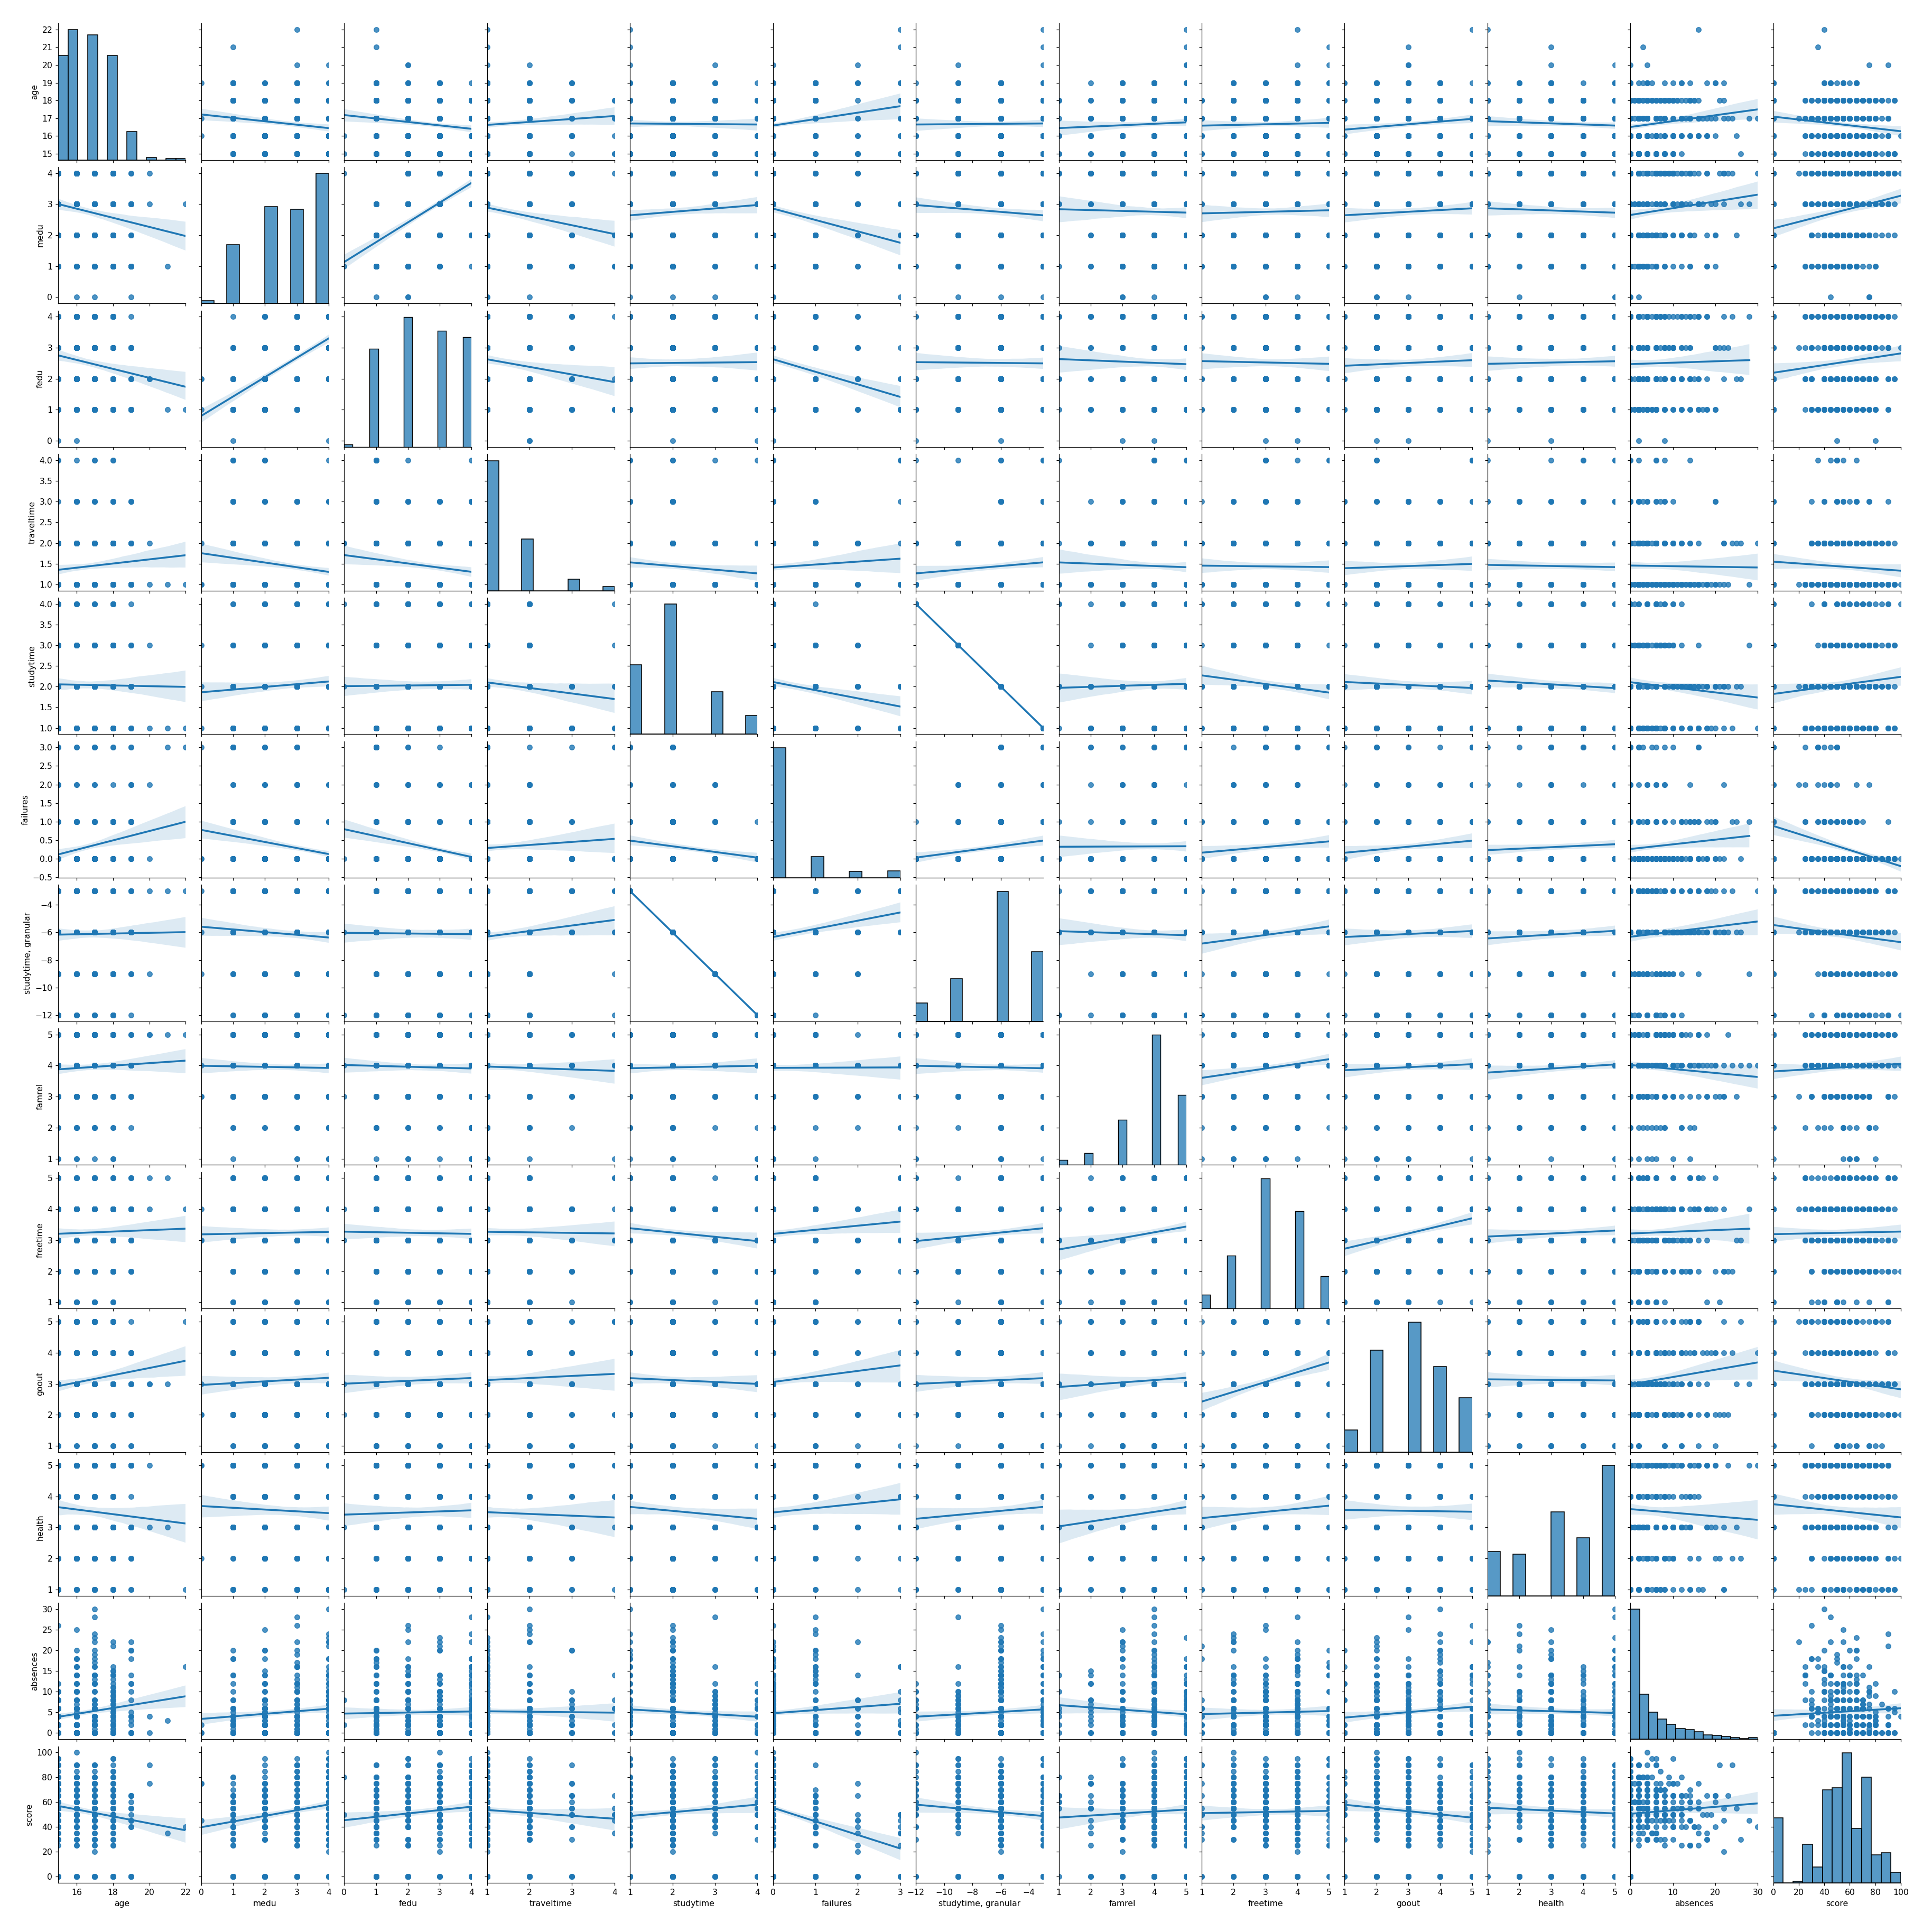

In [176]:
# plot correlation between quantitative data USING DATA WITH EMPTY CELLS
sns.pairplot(data, kind='reg')

<IPython.core.display.Javascript object>


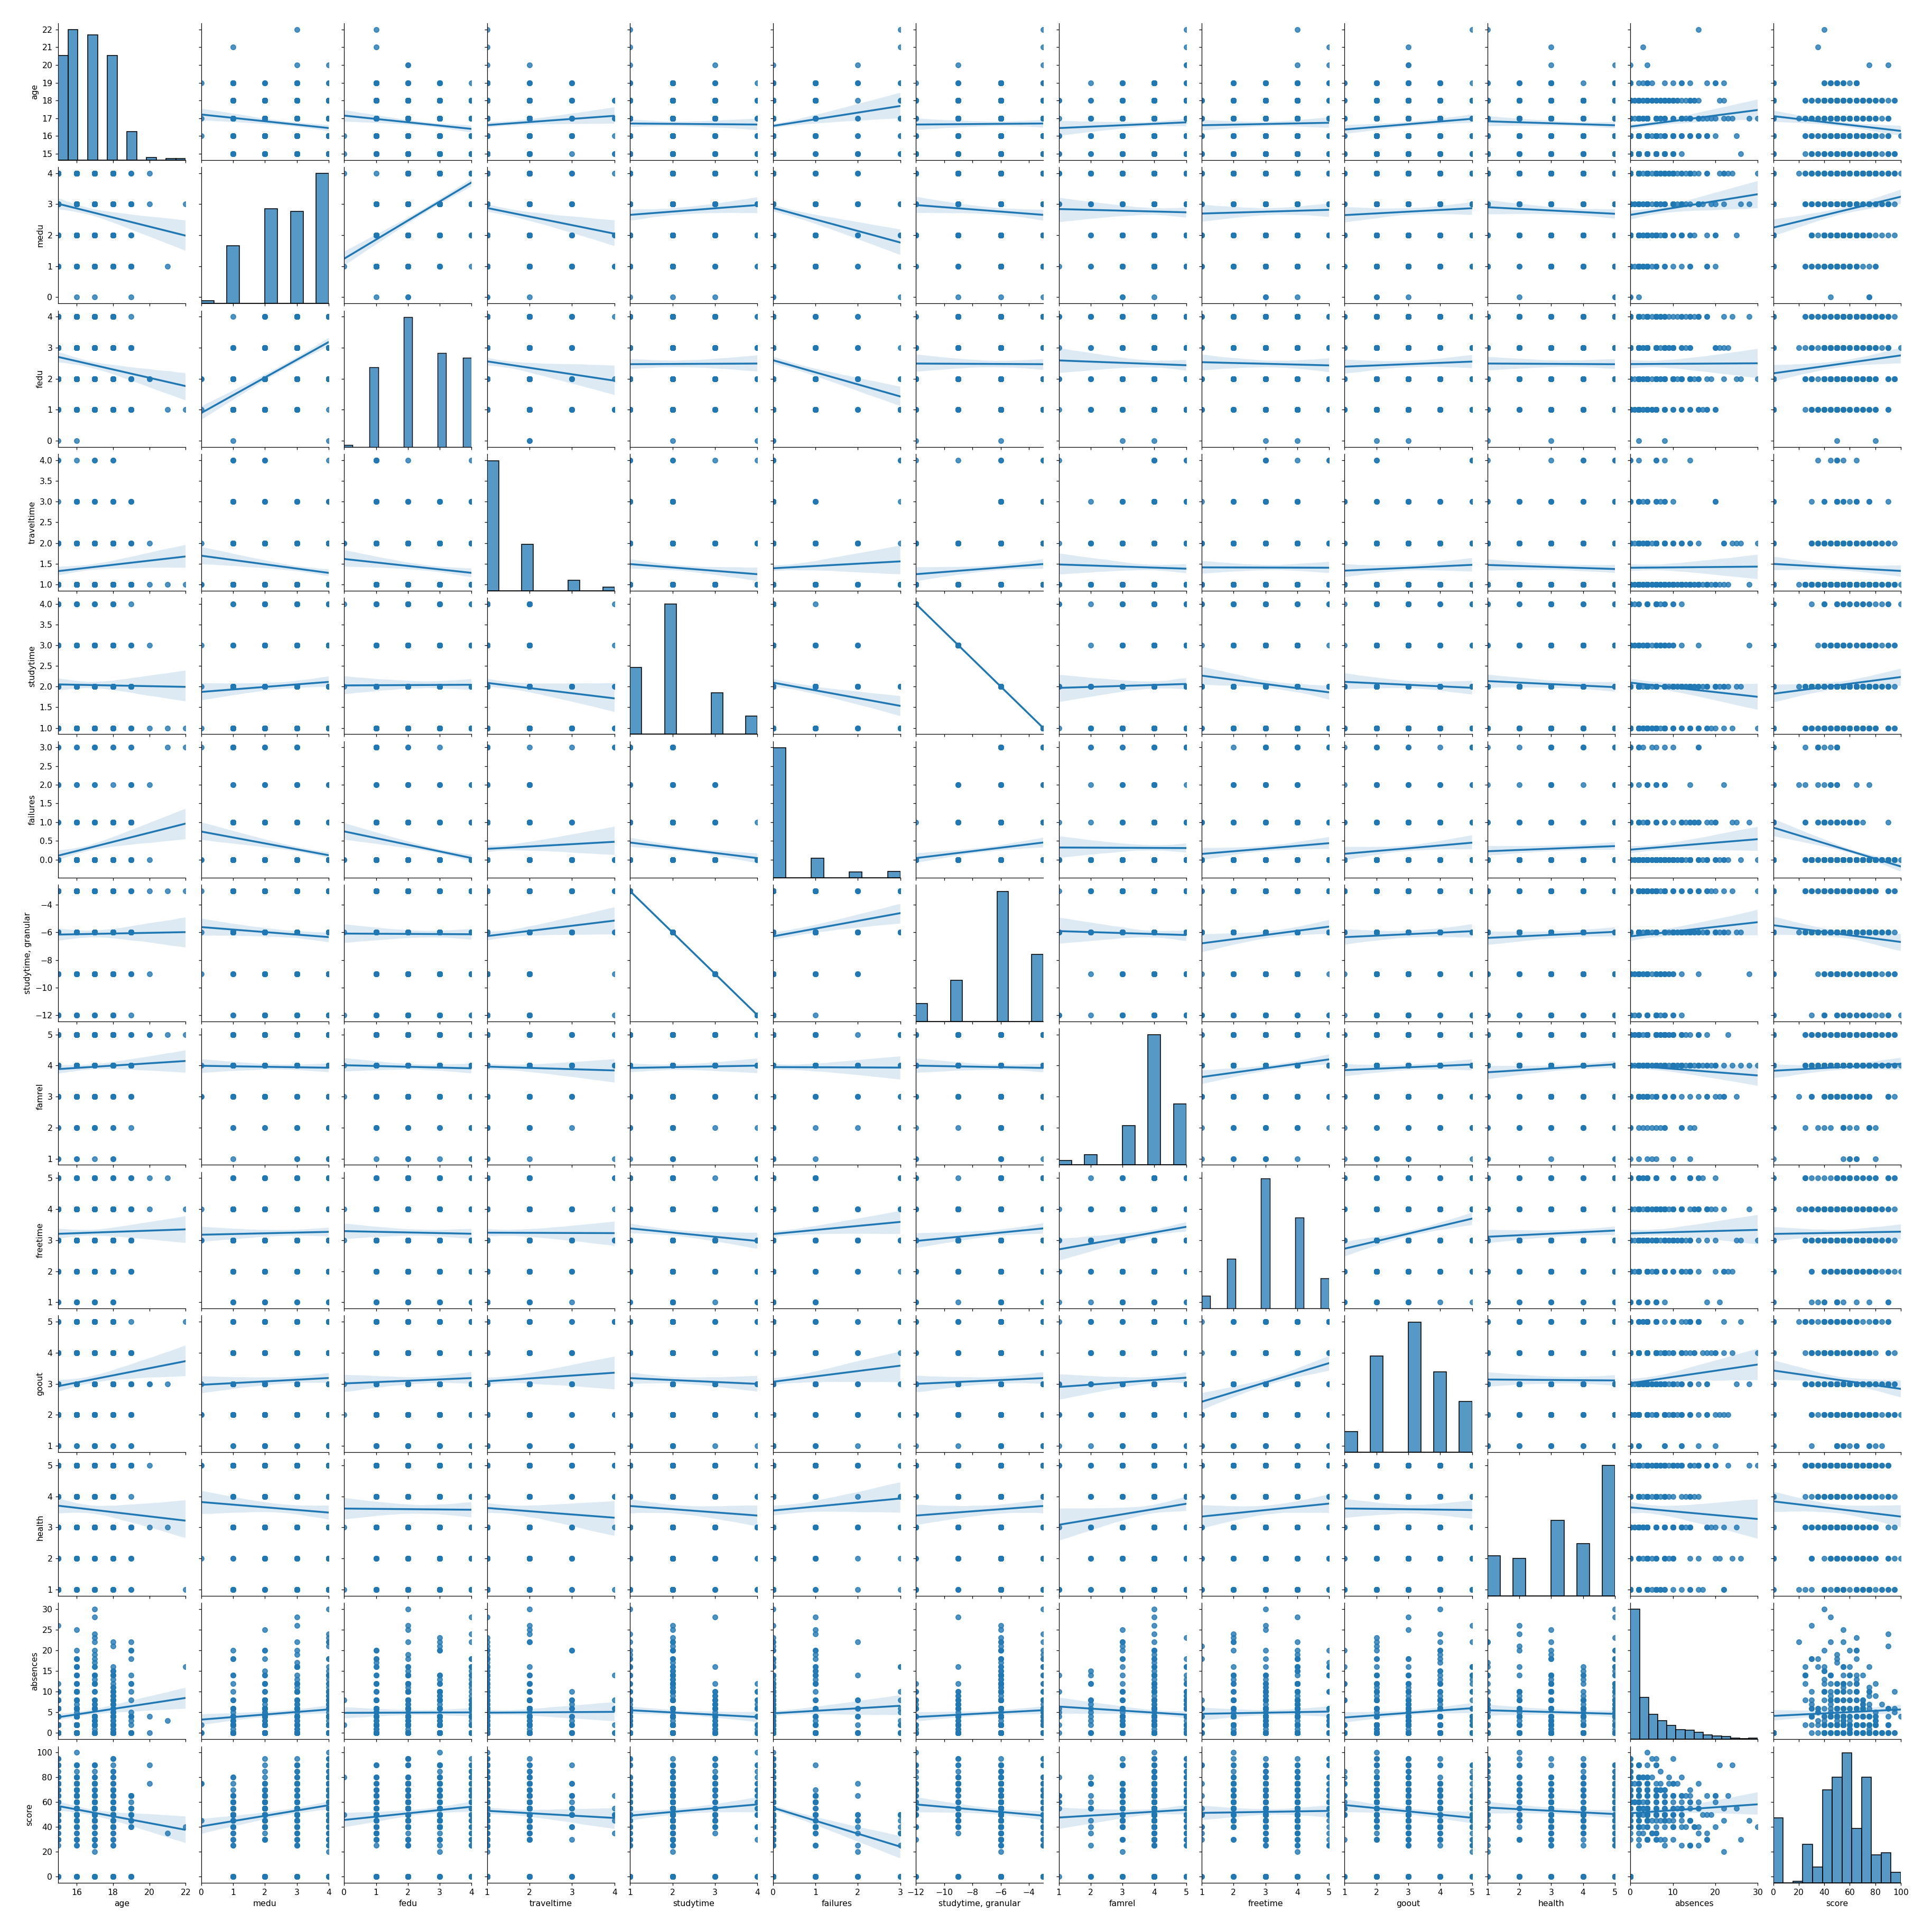

In [177]:
# plot correlation between quantitative data USING DATA WITHOUT EMPTY CELLS
sns.pairplot(data_filled, kind='reg')

In [178]:
# calculate correlation between quantitative values USING DATA WITH EMPTY CELLS
data.corr()

age      medu      fedu  traveltime  studytime  \
age                  1.000000 -0.168372 -0.167669    0.091799  -0.012992   
medu                -0.168372  1.000000  0.631001   -0.179412   0.085039   
fedu                -0.167669  0.631001  1.000000   -0.157551   0.010353   
traveltime           0.091799 -0.179412 -0.157551    1.000000  -0.109110   
studytime           -0.012992  0.085039  0.010353   -0.109110   1.000000   
failures             0.214234 -0.244731 -0.275795    0.076463  -0.173969   
studytime, granular  0.012992 -0.085039 -0.010353    0.109110  -1.000000   
famrel               0.056880 -0.021766 -0.033765   -0.036574   0.025719   
freetime             0.030078  0.022284 -0.020024   -0.012500  -0.119867   
goout                0.133192  0.056745  0.045484    0.041531  -0.047334   
health              -0.068302 -0.045072  0.026822   -0.027764  -0.076607   
absences             0.153297  0.116053  0.024211   -0.013083  -0.085330   
score               -0.151937  0.219208  0.130248   -0.071457   0.112301   

                     failures  studytime, granular    famrel  freetime  \
age                  0.214234             0.012992  0.056880  0.030078   
medu                -0.244731            -0.085039 -0.021766  0.022284   
fedu                -0.275795            -0.010353 -0.033765 -0.020024   
traveltime           0.076463             0.109110 -0.036574 -0.012500   
studytime           -0.173969            -1.000000  0.025719 -0.119867   
failures             1.000000             0.173969  0.004264  0.100327   
studytime, granular  0.173969             1.000000 -0.025719  0.119867   
famrel               0.004264            -0.025719  1.000000  0.166748   
freetime             0.100327             0.119867  0.166748  1.000000   
goout                0.120413             0.047334  0.059976  0.278153   
health               0.075043             0.076607  0.101090  0.069803   
absences             0.097910             0.085330 -0.084033  0.031681   
score               -0.344623            -0.112301  0.062638  0.019512   

                        goout    health  absences     score  
age                  0.133192 -0.068302  0.153297 -0.151937  
medu                 0.056745 -0.045072  0.116053  0.219208  
fedu                 0.045484  0.026822  0.024211  0.130248  
traveltime           0.041531 -0.027764 -0.013083 -0.071457  
studytime           -0.047334 -0.076607 -0.085330  0.112301  
failures             0.120413  0.075043  0.097910 -0.344623  
studytime, granular  0.047334  0.076607  0.085330 -0.112301  
famrel               0.059976  0.101090 -0.084033  0.062638  
freetime             0.278153  0.069803  0.031681  0.019512  
goout                1.000000 -0.011418  0.124583 -0.125179  
health              -0.011418  1.000000 -0.049040 -0.069880  
absences             0.124583 -0.049040  1.000000  0.071467  
score               -0.125179 -0.069880  0.071467  1.000000

In [179]:
# calculate correlation between quantitative values USING DATA WITHOUT EMPTY CELLS
data_filled.corr()

age      medu      fedu  traveltime  studytime  \
age                  1.000000 -0.167283 -0.158804    0.094099  -0.012813   
medu                -0.167283  1.000000  0.592542   -0.169495   0.079913   
fedu                -0.158804  0.592542  1.000000   -0.132212   0.005373   
traveltime           0.094099 -0.169495 -0.132212    1.000000  -0.100980   
studytime           -0.012813  0.079913  0.005373   -0.100980   1.000000   
failures             0.214366 -0.242856 -0.263676    0.059356  -0.161671   
studytime, granular  0.012813 -0.079913 -0.005373    0.100980  -1.000000   
famrel               0.054951 -0.020436 -0.031013   -0.032418   0.024312   
freetime             0.026782  0.026421 -0.023408   -0.003261  -0.116928   
goout                0.132042  0.055103  0.042179    0.056667  -0.047265   
health              -0.062107 -0.066927 -0.007391   -0.050601  -0.061366   
absences             0.144231  0.116898  0.004818    0.007973  -0.079353   
score               -0.151216  0.205769  0.124056   -0.057124   0.110422   

                     failures  studytime, granular    famrel  freetime  \
age                  0.214366             0.012813  0.054951  0.026782   
medu                -0.242856            -0.079913 -0.020436  0.026421   
fedu                -0.263676            -0.005373 -0.031013 -0.023408   
traveltime           0.059356             0.100980 -0.032418 -0.003261   
studytime           -0.161671            -1.000000  0.024312 -0.116928   
failures             1.000000             0.161671 -0.004579  0.096709   
studytime, granular  0.161671             1.000000 -0.024312  0.116928   
famrel              -0.004579            -0.024312  1.000000  0.160710   
freetime             0.096709             0.116928  0.160710  1.000000   
goout                0.113402             0.047265  0.058413  0.274546   
health               0.066889             0.061366  0.103752  0.072186   
absences             0.075442             0.079353 -0.072630  0.022419   
score               -0.329537            -0.110422  0.059066  0.017123   

                        goout    health  absences     score  
age                  0.132042 -0.062107  0.144231 -0.151216  
medu                 0.055103 -0.066927  0.116898  0.205769  
fedu                 0.042179 -0.007391  0.004818  0.124056  
traveltime           0.056667 -0.050601  0.007973 -0.057124  
studytime           -0.047265 -0.061366 -0.079353  0.110422  
failures             0.113402  0.066889  0.075442 -0.329537  
studytime, granular  0.047265  0.061366  0.079353 -0.110422  
famrel               0.058413  0.103752 -0.072630  0.059066  
freetime             0.274546  0.072186  0.022419  0.017123  
goout                1.000000 -0.009790  0.106230 -0.123376  
health              -0.009790  1.000000 -0.051955 -0.080029  
absences             0.106230 -0.051955  1.000000  0.061070  
score               -0.123376 -0.080029  0.061070  1.000000

In [180]:
# It seems that there is no big difference between filled & data with NaN values
# age, traveltime, failures, studytime, granular, goout, health - have negative correlation with score value
# medu, fedu, studytime, famrel, freetime, absences - have positive correlation

# Interesting that:
# - the older the worse the score
# - the further the student lives, the worse
# - studytime, granular increasing also leads to worse score
# - spending time with friends leads to worse score
# - the better the health the worse the score
#
# - the more freetime => more time to relax => the higher the score
# - the more absences the higher the score  - it's very strange
#
# Obvious that :
# - the better parents education & relationships in family the higher the score
# - the more time children spend studying the higher the score
# - the more failures, the worse the score

# It seems all correlation values are low, but i'll use all columns for the model
final_cols = num_cols.drop('score')
final_cols

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences'],
      dtype='object')

<IPython.core.display.Javascript object>


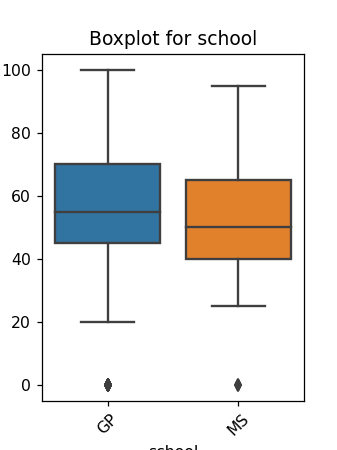

<IPython.core.display.Javascript object>


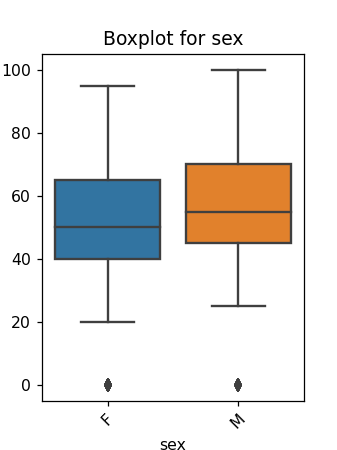

<IPython.core.display.Javascript object>


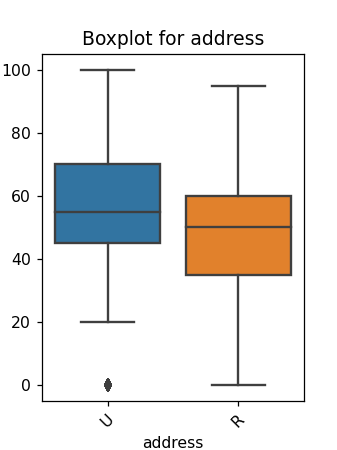

<IPython.core.display.Javascript object>


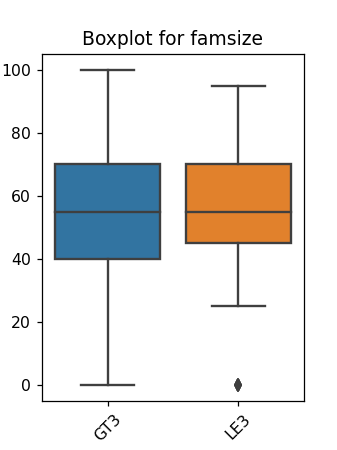

<IPython.core.display.Javascript object>


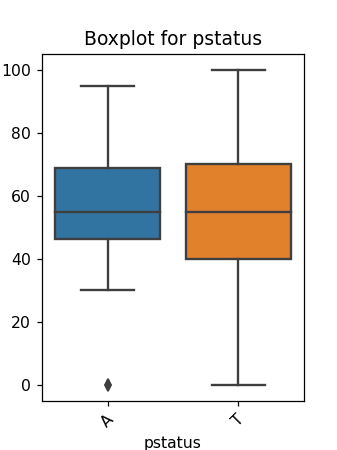

<IPython.core.display.Javascript object>


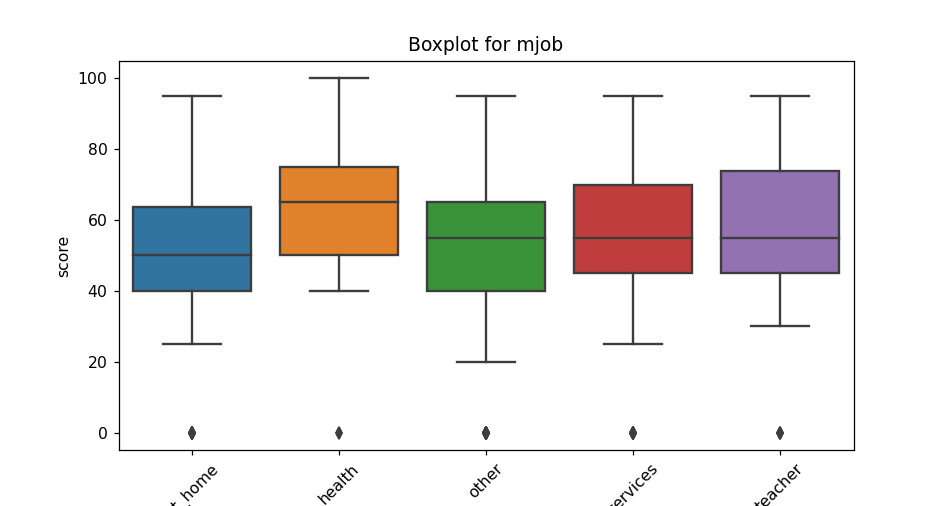

<IPython.core.display.Javascript object>


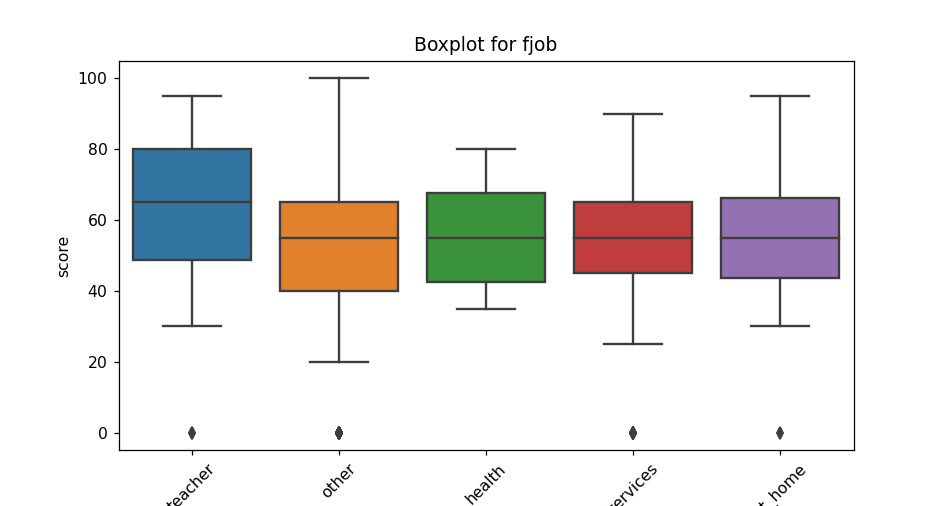

<IPython.core.display.Javascript object>


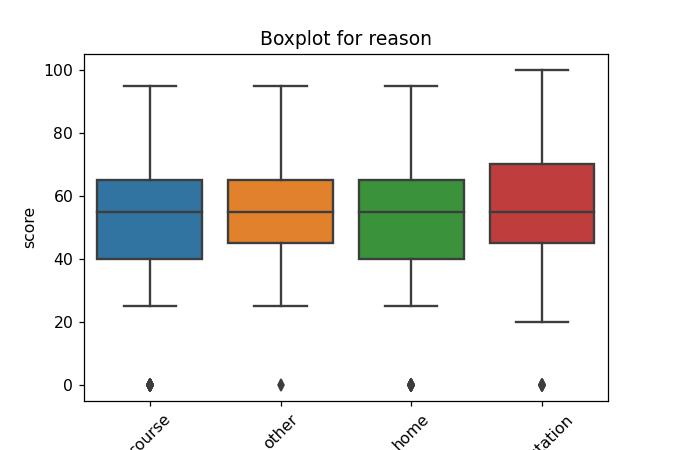

<IPython.core.display.Javascript object>


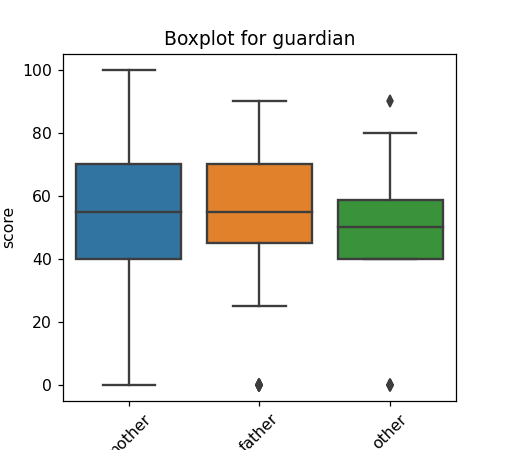

<IPython.core.display.Javascript object>


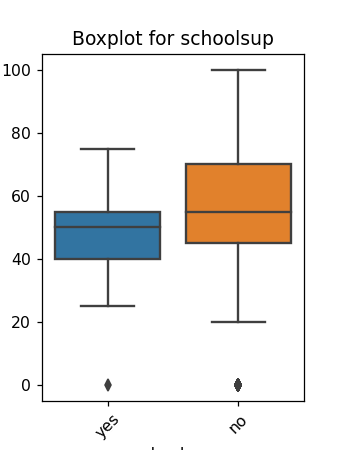

<IPython.core.display.Javascript object>


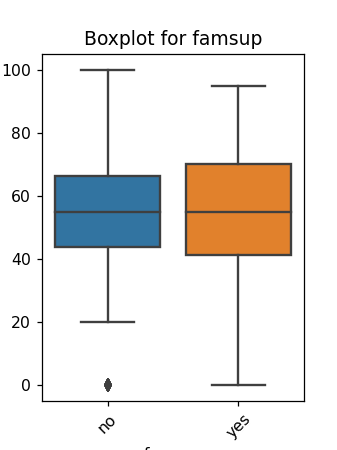

<IPython.core.display.Javascript object>


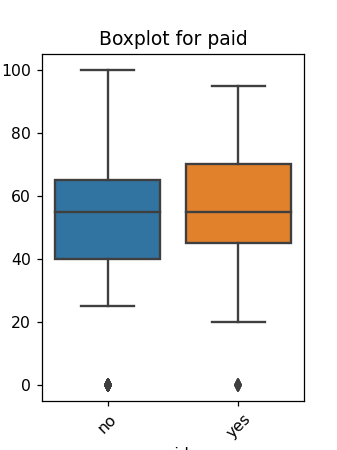

<ipython-input-159-72e17206a38f>:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (d[column].nunique()*1.5, 4))


<IPython.core.display.Javascript object>


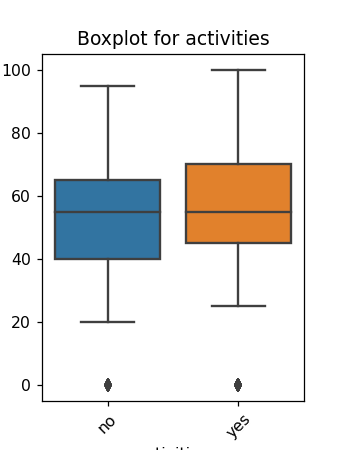

<IPython.core.display.Javascript object>


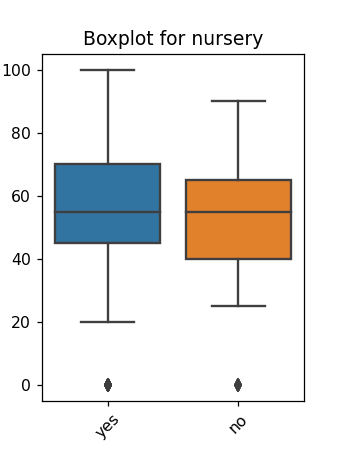

<IPython.core.display.Javascript object>


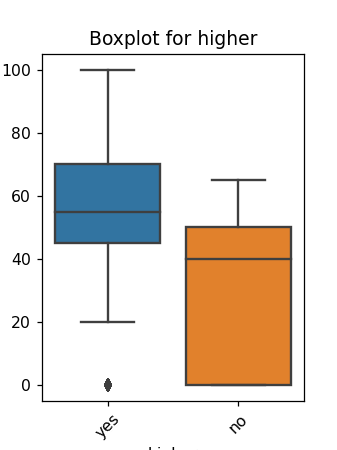

<IPython.core.display.Javascript object>


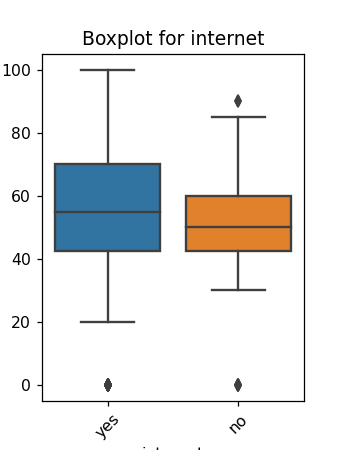

<IPython.core.display.Javascript object>


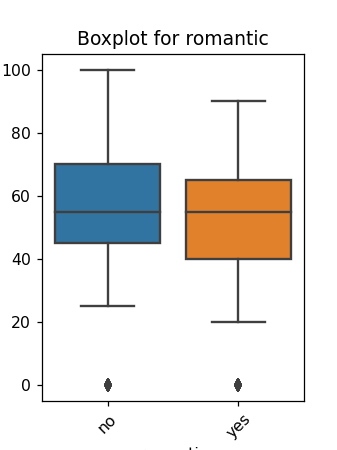

In [181]:
# boxplots of the nominative columns


# for NaN replaced data
for col in cat_cols:
    get_boxplot(data_filled, col)

<IPython.core.display.Javascript object>


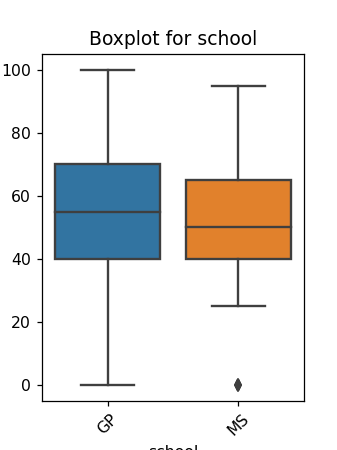

<IPython.core.display.Javascript object>


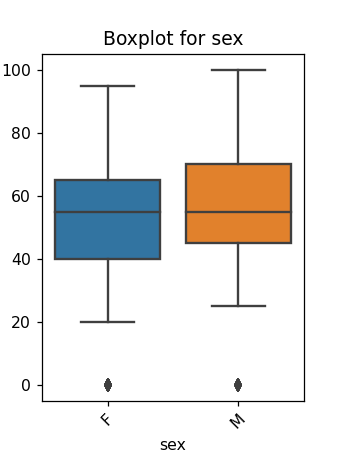

<IPython.core.display.Javascript object>


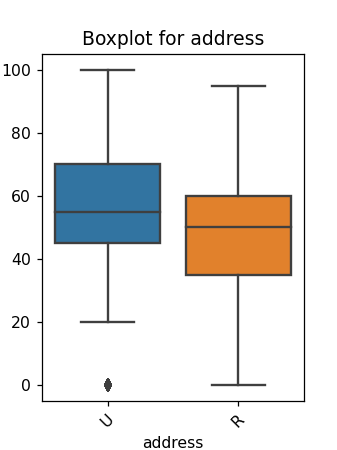

<IPython.core.display.Javascript object>


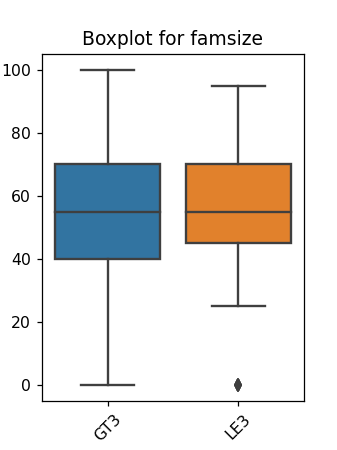

<IPython.core.display.Javascript object>


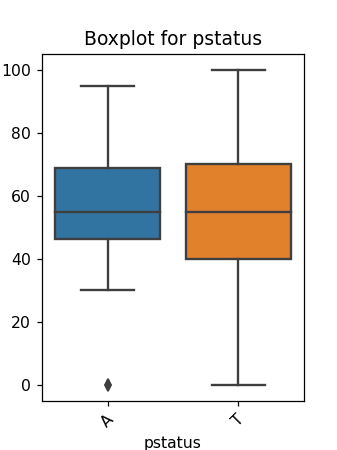

<IPython.core.display.Javascript object>


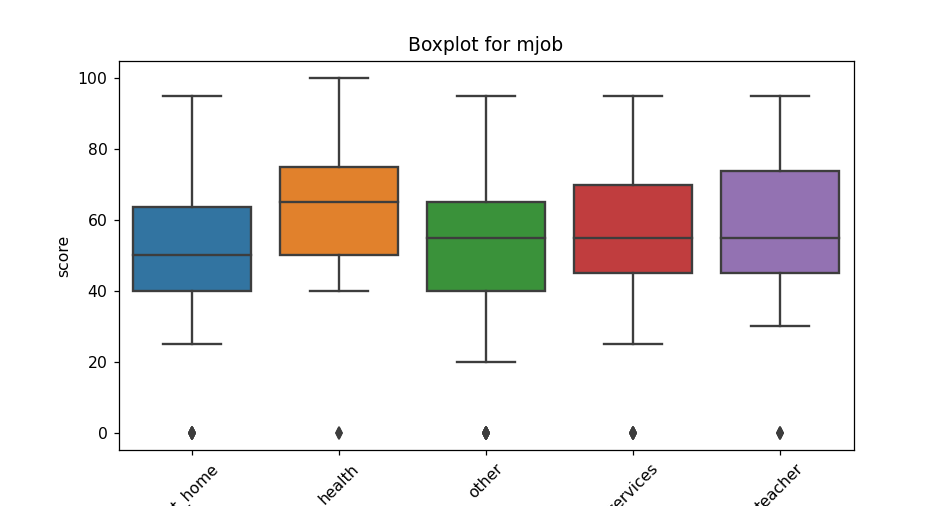

<IPython.core.display.Javascript object>


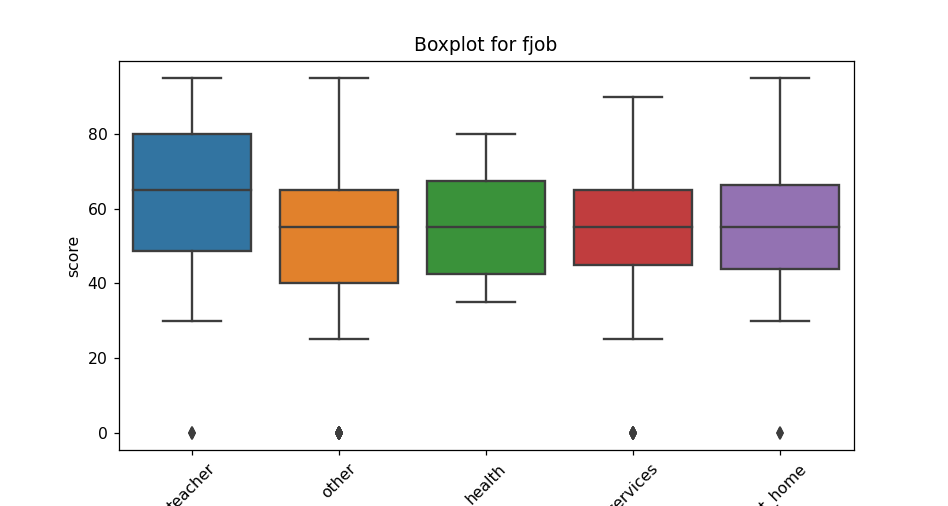

<IPython.core.display.Javascript object>


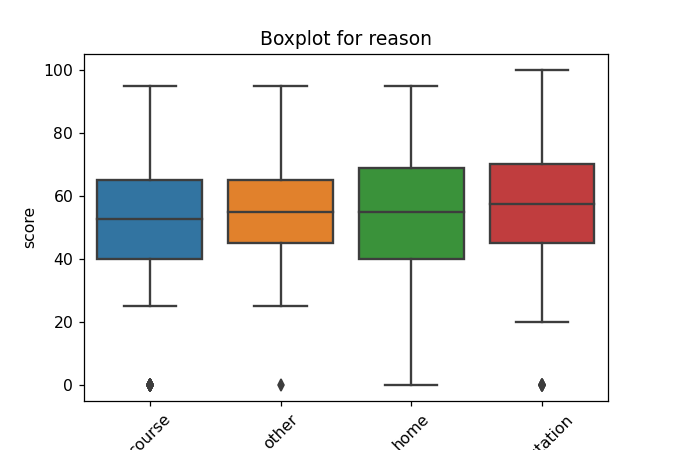

<IPython.core.display.Javascript object>


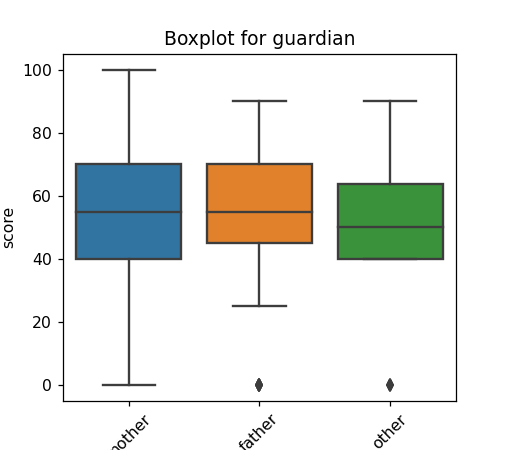

<IPython.core.display.Javascript object>


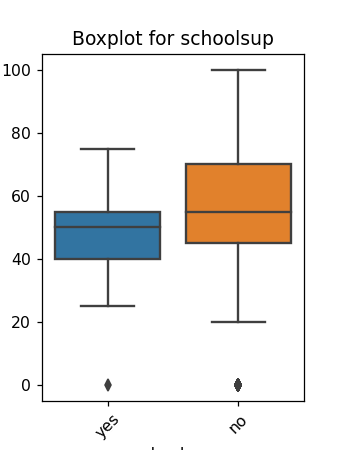

<IPython.core.display.Javascript object>


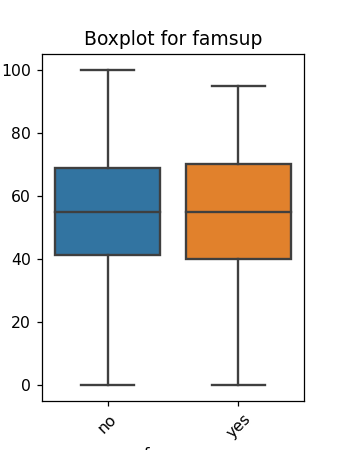

<IPython.core.display.Javascript object>


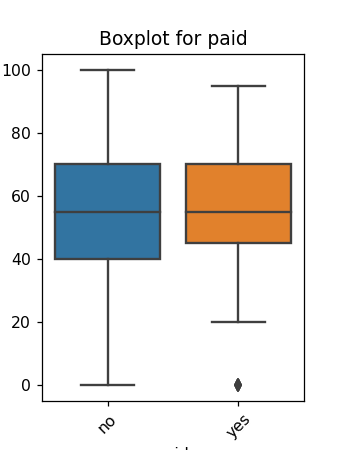

<IPython.core.display.Javascript object>


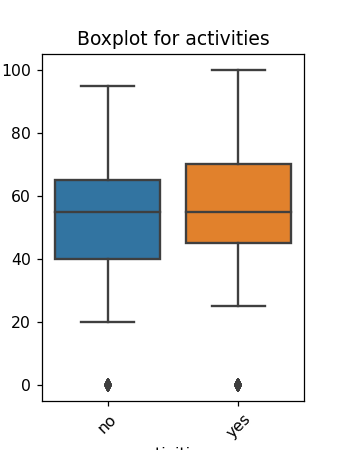

<IPython.core.display.Javascript object>


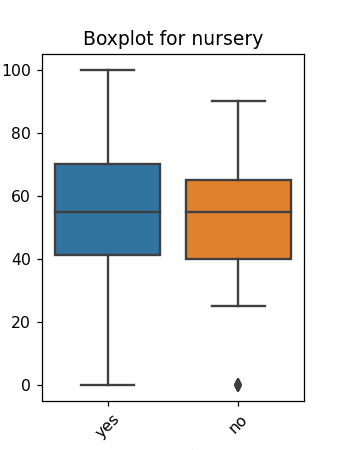

<IPython.core.display.Javascript object>


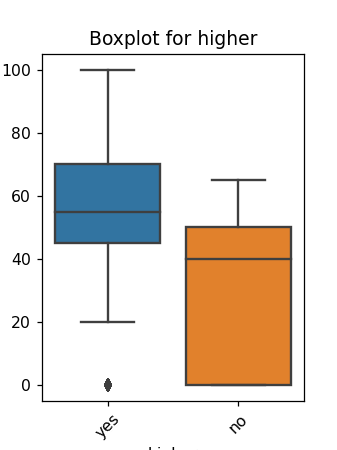

<IPython.core.display.Javascript object>


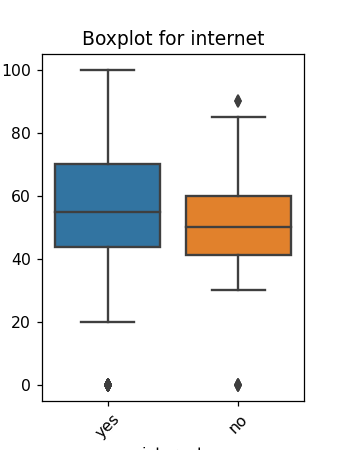

<IPython.core.display.Javascript object>


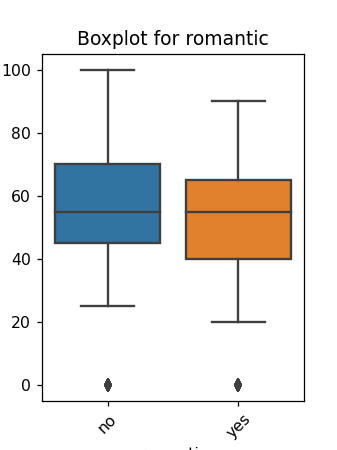

In [182]:
# check boxplots of data with NaN's
for col in cat_cols:
    get_boxplot(data, col)

In [183]:
# According to the boxplots of mode filled data:
# famsize, pstatus, reason, guardin, famsup, paid, activities, nursery, romantic - don't rely on score
# school, sex, address, mjob, fjob, schoolsup, higher, internet - could rely on score

# Almost the same situation we could see in data with NaN's, only 1 boxplot differs - 'reason' column

In [184]:
# Student's t-test

# this function is here because i need some help to understand:
# why i've got different results using different cols calculating
# 'ind' - cols = dat.loc[:, column].value_counts().index[:10]
# 'un' - cols = dat.loc[:, column].unique() mean the same but
# i've got different results using data with nan's in 'ind' & 'un' mode
# (ind - 'sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher', 'romantic' ;
# 'un' - 'sex', 'higher', 'romantic')
# or sometimes just didn't get any results  for unique() calculation - have no idea why,
# could you please write the answer in your project review?

def get_stat_dif(dat, column, method):
    if method == 'ind':
        cols = dat.loc[:, column].value_counts().index[:10]
    elif method == 'un':
        cols = dat.loc[:, column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dat.loc[dat.loc[:, column] == comb[0], 'score'].dropna(),
                     dat.loc[dat.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [185]:
for col in cat_cols:
    get_stat_dif(data_filled, col, 'ind')

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [186]:
for col in cat_cols:
    get_stat_dif(data, col, 'un')

# also interesting that for data with NaN's (without dropna() in function)
# i've got only mjob column with statistically significant differences

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [187]:
# in nominative columns according to the t-test 'sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher', 'romantic'
# are the columns with statistically significant differences & in general it correlates with the boxplot conclusions
final_cols = final_cols.tolist(
)+['sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher', 'romantic']
display(final_cols)

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'sex',
 'address',
 'mjob',
 'schoolsup',
 'paid',
 'higher',
 'romantic']

In [188]:
# will use mode filled data in the final data
final_data = data_filled.loc[:, final_cols]
final_data.head()

age  medu  fedu  traveltime  studytime  failures  studytime, granular  \
0   18   4.0   4.0         2.0        2.0       0.0                 -6.0   
1   17   1.0   1.0         1.0        2.0       0.0                 -6.0   
2   15   1.0   1.0         1.0        2.0       3.0                 -6.0   
3   15   4.0   2.0         1.0        3.0       0.0                 -9.0   
4   16   3.0   3.0         1.0        2.0       0.0                 -6.0   

   famrel  freetime  goout  health  absences sex address     mjob schoolsup  \
0     4.0       3.0    4.0     3.0       6.0   F       U  at_home       yes   
1     5.0       3.0    3.0     3.0       4.0   F       U  at_home        no   
2     4.0       3.0    2.0     3.0      10.0   F       U  at_home       yes   
3     3.0       2.0    2.0     5.0       2.0   F       U   health        no   
4     4.0       3.0    2.0     5.0       4.0   F       U    other        no   

  paid higher romantic  
0   no    yes       no  
1   no    yes       no  
2   no    yes       no  
3  yes    yes      yes  
4  yes    yes       no

In [189]:
# conclusions:
# - there are about 5% of NaN's in the initial data
# - the real outliers were only in fedu, famrel, absences - so the data was clear enough

# Interesting that:
# - the older the worse the score
# - the further the student lives, the worse
# - studytime, granular increasing also leads to worse score
# - spending time with friends leads to worse score
# - the better the health the worse the score
#
# - the more freetime => more time to relax => the higher the score
# - the more absences the higher the score  - it's very strange

# We will use age, medu, fedu, traveltime, studytime, failures, studytime, granular, famrel, freetime, goout, health, absences,
# sex, address, mjob, schoolsup, paid, higher, romantic columns in the final data